In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree
import graphviz
import pydotplus
from IPython.display import Image

In [2]:
# 1. Cargar el dataset
data = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

In [3]:
# 2. Definir las variables independientes y dependientes
# Usamos las variables definidas en el contexto como independientes y 'HGB' como dependiente
X = data[['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3']]  # Variables independientes
y = data['HGB']  # Variable dependiente

In [4]:
# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 4. Crear el modelo de árbol de decisión para regresión
tree_regressor = DecisionTreeRegressor(random_state=42)

In [6]:
# 5. Entrenar el modelo
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [7]:
# 6. Realizar predicciones con el conjunto de prueba
y_pred = tree_regressor.predict(X_test)

In [8]:
# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

Error Cuadrático Medio (MSE): 0.8510958904109587
Coeficiente de Determinación (R2): 0.8412147874503566


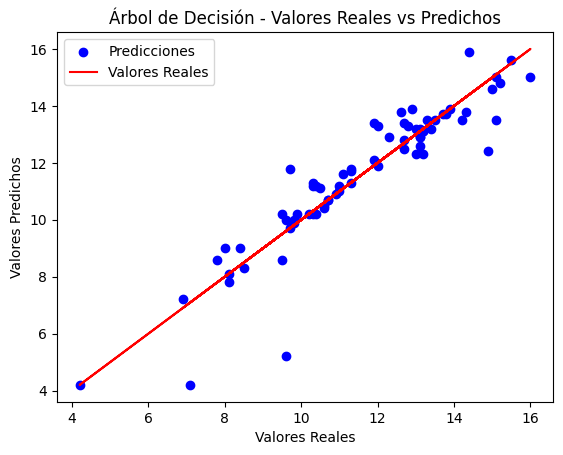

In [9]:
# 8. Visualizar los resultados reales vs predichos en una gráfica de dispersión
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot(y_test, y_test, color='red', label='Valores Reales')
plt.title('Árbol de Decisión - Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

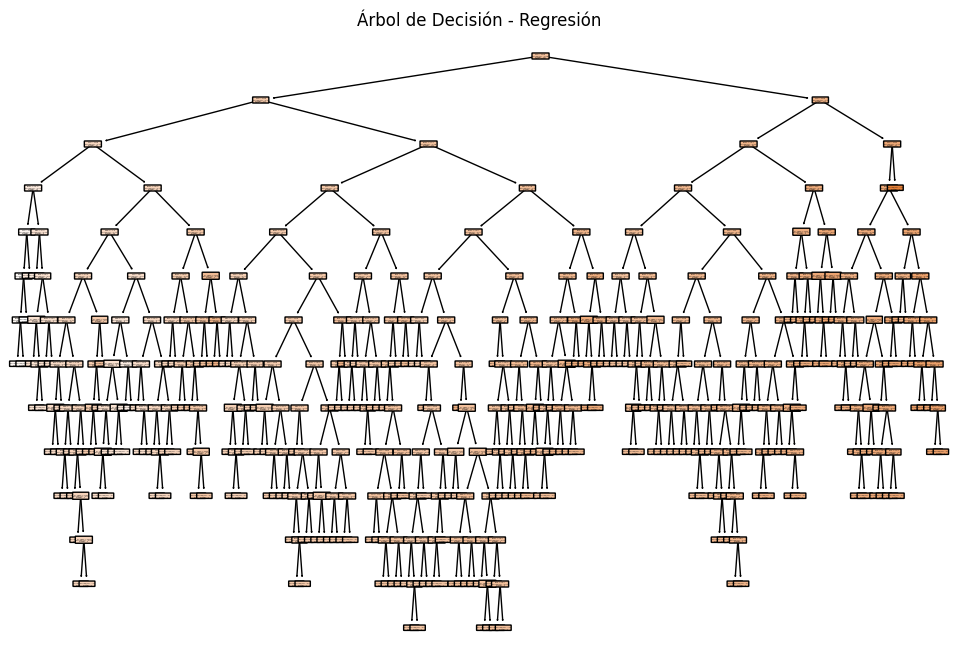

In [12]:
# 8. Visualización del árbol de decisión entrenado
plt.figure(figsize=(12,8))
plot_tree(tree_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title('Árbol de Decisión - Regresión')
plt.show()

In [14]:
# 8. Visualización del árbol de decisión con graphviz
dot_data = export_graphviz(tree_regressor, out_file=None, 
                           feature_names=X.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)

In [15]:
# Crear un gráfico con graphviz
graph = graphviz.Source(dot_data) 

# Mostrar el gráfico
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# 9. Crear una tabla de resultados reales vs predichos
results = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
print(results.head(10))

# Definir el rango de hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Crear el modelo
tree_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Realizar Grid Search
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados por Grid Search:", grid_search.best_params_)

In [ ]:
# Entrenar el modelo con los mejores parámetros
best_tree_regressor = grid_search.best_estimator_

In [ ]:
# Realizar predicciones con el conjunto de prueba
y_pred = best_tree_regressor.predict(X_test)

In [ ]:
# Evaluar el modelo optimizado
mse_optimized = mean_squared_error(y_test, y_pred)
r2_optimized = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE) Optimizado:", mse_optimized)
print("Coeficiente de Determinación (R2) Optimizado:", r2_optimized)